In [45]:
%matplotlib inline

In [46]:
import os
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.image import BboxImage, imread
from matplotlib.transforms import Bbox
from PIL import Image
import seaborn as sns

In [47]:
mpl.rcParams["figure.dpi"] = 70
mpl.rcParams["savefig.dpi"] = 70
IMG_ROOT = "./images"

# read images
image_paths = os.listdir("./images")
image_paths = [os.path.join(IMG_ROOT, p) for p in image_paths]
images = [Image.open(p) for p in image_paths]
print(images)

[<PIL.PngImagePlugin.PngImageFile image mode=RGB size=64x64 at 0x10C990A58>, <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=64x64 at 0x10C1406D8>, <PIL.PngImagePlugin.PngImageFile image mode=RGB size=64x64 at 0x10C140780>]


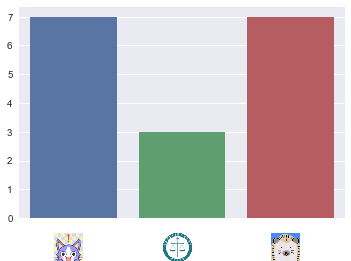

In [48]:
# show graph

y = np.random.randint(10, size=len(images))
x = np.array(range(len(images)))
ax = sns.barplot(x=x, y=y, ci=None)

# erase ticks
ax.get_xaxis().set_ticklabels([], fontsize=45)  # expand label size by fontsize parameter

TICK_POS = -0.25  # vertical position of icon in graph y-grid
SIZE_IN_TICK = 1  # icon in graph y-grid

def get_icon_position_from_order(ax, order, icon_size, vertical_position, offset=-0.35):
    scale = ax.transData.transform((1, 1)) - ax.transData.transform((0, 0))
    x_scale = scale[1] / scale[0]
    
    pos = order + offset
    left = pos - (icon_size * x_scale / 2)
    down = vertical_position - icon_size
    right = pos + (icon_size * x_scale / 2)
    top = vertical_position
    
    leftDown = ax.transData.transform((left, down))
    rightUpper = ax.transData.transform((right, top))
    return leftDown, rightUpper
    

for i, _x in enumerate(x):
    leftDown, rightUpper = get_icon_position_from_order(ax, i, SIZE_IN_TICK, TICK_POS)
    bbox_image = BboxImage(Bbox([leftDown, rightUpper]),
                           norm = None,
                           origin=None,
                           clip_on=False
                          )
    bbox_image.set_data(images[i])
    ax.add_artist(bbox_image)


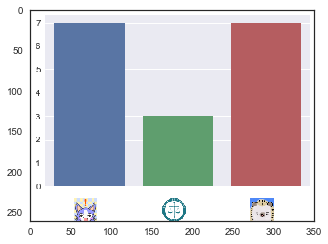

In [49]:
fig = ax.get_figure()
fig.savefig("icon_plot.PNG", bbox_inches="tight")
with sns.axes_style("white"):
    plt.imshow(Image.open("icon_plot.PNG"))